## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

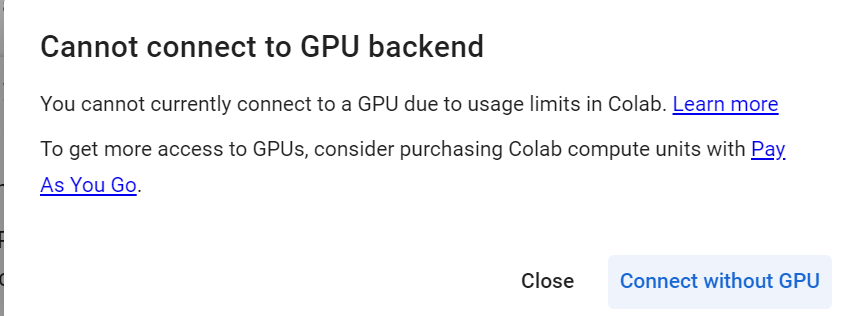

## **Installing and Importing Necessary Libraries**

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
homeFldr = '/content/drive/MyDrive/Colab Notebooks/05_NLP_LLM/'

# Code to read the data
currFldr = '03_StockMarket_NewsSentiment_Analysis_Summarization/'
fileFldr = homeFldr + currFldr
print(fileFldr)
Data2 = pd.read_csv(fileFldr + "stock_news_orig.csv")
Data2.head()

print(Data2)

/content/drive/MyDrive/Colab Notebooks/05_NLP_LLM/03_StockMarket_NewsSentiment_Analysis_Summarization/
           Date                                               News       Open  \
0    2019-01-02   The tech sector experienced a significant dec...  41.740002   
1    2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2    2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3    2019-01-02   This news article reports that yields on long...  41.740002   
4    2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   
..          ...                                                ...        ...   
344  2019-04-30   Media mogul Oprah Winfrey, known for influenc...  50.764999   
345  2019-04-30   European shares fell on Tuesday, with banks u...  50.764999   
346  2019-04-30   This article reports that the S&P 500 reached...  50.764999   
347  2019-04-30   The Federal Reserve is anticipated to keep in...  50.764999   
348  2

In [ ]:
df=Data2.copy()
df.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 238.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 263.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 143.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 293.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 253.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have nu

In [ ]:
!pip install huggingface_hub datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00


In [ ]:
# Importing library for data manipulation
import pandas as pd

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json library
import json

#Importing the datasets library from huggingface
from datasets import load_dataset

## **Loading the dataset**

## **Data Overview**

In [ ]:
data = df.copy()
data.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
print(len(data))

349


In [ ]:
data.shape

(349, 8)

In [ ]:
data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


In [ ]:
data.duplicated().sum()

0

## **Exploratory Data Analysis**

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to import Word2Vec
from gensim.models import Word2Vec

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<ipython-input-13-1efd3ad12d5f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


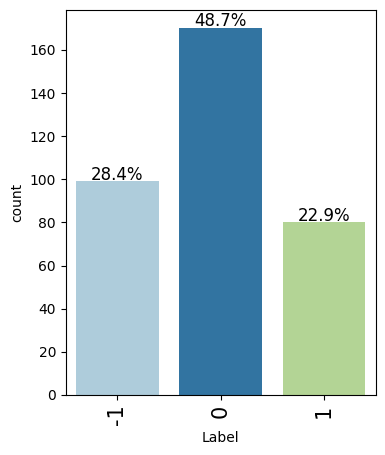

In [ ]:
labeled_barplot(data, "Label", perc=True)

## **Data Preprocessing**

In [ ]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [ ]:
# Applying the function to remove special characters
data['cleaned_text'] = data['News'].apply(remove_special_characters)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",The tech sector experienced a significant decline in the aftermarket following Apple s Q1 revenue warning Notable suppliers including Skyworks Broadcom Lumentum Qorvo and TSMC saw their stocks drop in response to Apple s downward revision of its revenue expectations for the quarter previously announced in January
1,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",Apple lowered its fiscal Q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iPhone sales The announcement caused a significant drop in Apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as Nasdaq 10
2,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",Apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in China and fewer iPhone upgrades CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks Apple s shares fell 8 5 in post market trading while Asian suppliers like Hon
3,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",This news article reports that yields on long dated U S Treasury securities hit their lowest levels in nearly a year on January 2 2019 due to concerns about the health of the global economy following weak economic data from China and Europe as well as the partial U S government shutdown Apple


In [ ]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",the tech sector experienced a significant decline in the aftermarket following apple s q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo and tsmc saw their stocks drop in response to apple s downward revision of its revenue expectations for the quarter previously announced in january
1,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",apple lowered its fiscal q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iphone sales the announcement caused a significant drop in apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as nasdaq 10
2,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in china and fewer iphone upgrades ceo tim cook also mentioned constrained sales of airpods and macbooks apple s shares fell 8 5 in post market trading while asian suppliers like hon
3,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",this news article reports that yields on long dated u s treasury securities hit their lowest levels in nearly a year on january 2 2019 due to concerns about the health of the global economy following weak economic data from china and europe as well as the partial u s government shutdown apple


In [ ]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",the tech sector experienced a significant decline in the aftermarket following apple s q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo and tsmc saw their stocks drop in response to apple s downward revision of its revenue expectations for the quarter previously announced in january
1,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",apple lowered its fiscal q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iphone sales the announcement caused a significant drop in apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as nasdaq 10
2,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in china and fewer iphone upgrades ceo tim cook also mentioned constrained sales of airpods and macbooks apple s shares fell 8 5 in post market trading while asian suppliers like hon
3,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",this news article reports that yields on long dated u s treasury securities hit their lowest levels in nearly a year on january 2 2019 due to concerns about the health of the global economy following weak economic data from china and europe as well as the partial u s government shutdown apple


### Removing stopwords

* The idea with stop word removal is to **exclude words that appear frequently throughout** all the documents in the corpus.
* Pronouns and articles are typically categorized as stop words.
* The `NLTK` library has an in-built list of stop words and it can utilize that list to remove the stop words from a dataset.

In [ ]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [ ]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,the tech sector experienced a significant decline in the aftermarket following apple s q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo and tsmc saw their stocks drop in response to apple s downward revision of its revenue expectations for the quarter previously announced in january,tech sector experienced significant decline aftermarket following apple q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo tsmc saw stocks drop response apple downward revision revenue expectations quarter previously announced january
1,apple lowered its fiscal q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iphone sales the announcement caused a significant drop in apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as nasdaq 10,apple lowered fiscal q1 revenue guidance 84 billion earlier estimates 89 93 billion due weaker expected iphone sales announcement caused significant drop apple stock price negatively impacted related suppliers leading broader market declines tech indices nasdaq 10
2,apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in china and fewer iphone upgrades ceo tim cook also mentioned constrained sales of airpods and macbooks apple s shares fell 8 5 in post market trading while asian suppliers like hon,apple cut fiscal first quarter revenue forecast 89 93 billion 84 billion due weaker demand china fewer iphone upgrades ceo tim cook also mentioned constrained sales airpods macbooks apple shares fell 8 5 post market trading asian suppliers like hon
3,this news article reports that yields on long dated u s treasury securities hit their lowest levels in nearly a year on january 2 2019 due to concerns about the health of the global economy following weak economic data from china and europe as well as the partial u s government shutdown apple,news article reports yields long dated u treasury securities hit lowest levels nearly year january 2 2019 due concerns health global economy following weak economic data china europe well partial u government shutdown apple


### Stemming

Stemming is a language processing method that chops off word endings to find the root or base form of words.

For example,

- Original Word: Jumping, Stemmed Word: Jump
- Original Word: Running, Stemmed Word: Run

The Porter Stemmer is one of the widely-used algorithms for stemming, and it shorten words to their root form by removing suffixes.

In [ ]:
# # Loading the Porter Stemmer
# ps = PorterStemmer()

In [ ]:
# # defining a function to perform stemming
# def apply_porter_stemmer(text):
#     # Split text into separate words
#     words = text.split()

#     # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
#     new_text = ' '.join([ps.stem(word) for word in words])

#     return new_text

In [ ]:
# # Applying the function to perform stemming
# data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [ ]:
# # checking a couple of instances of cleaned data
# data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

## Text Vectorization

### Count Vectorizer

- We'll use the [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class of sklearn to vectorize the data using Bag of Words (BoW).

- We first create the document-term matrix, where each value in the matrix stores the count of a term in a document.

- We then consider only the top *n* terms by frequency
    - *n* is a hyperparameter that one can change and experiment with

In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying TfidfVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
data_features_BOW.shape

(349, 1000)

In [ ]:
# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

In [ ]:
# Checking the words considered by BoW model
words

array(['000', '06', '10', '100', '11', '13', '14', '15', '16', '17', '18',
       '20', '200', '2014', '2016', '2017', '2018', '2019', '2020', '21',
       '24', '25', '26', '28', '30', '300', '31', '36', '3d', '44', '50',
       '500', '54', '5g', '84', '89', '99', 'aac', 'aapl', 'about',
       'accepting', 'access', 'according', 'accounts', 'accused',
       'acknowledged', 'acquisition', 'across', 'active', 'activity',
       'ad', 'added', 'advanced', 'advertising', 'adviser', 'affected',
       'after', 'against', 'agency', 'agreement', 'ahead', 'aid', 'aimed',
       'aiming', 'aims', 'air', 'airpods', 'album', 'alexa', 'alibaba',
       'all', 'allegedly', 'allow', 'allowed', 'allowing', 'allows',
       'along', 'alphabet', 'already', 'also', 'amazon', 'american',
       'amid', 'amidst', 'ams', 'an', 'analyst', 'analysts', 'and',
       'android', 'announced', 'announcement', 'annual', 'another',
       'answered', 'anticipated', 'anticipates', 'antitrust', 'app',
       'app

In [ ]:
# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

,000,06,10,100,11,13,14,15,16,17,...,years,yen,yet,yield,yields,york,yoy,yuan,zeux,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## **Word Embeddings**

### Word2Vec

In [ ]:
# creating a list of all words in our data
words_list = [item.split(" ") for item in data['cleaned_text'].values]

In [ ]:
# Checking the words from the first five reviews
words_list[0:5]

[['the',
  'tech',
  'sector',
  'experienced',
  'a',
  'significant',
  'decline',
  'in',
  'the',
  'aftermarket',
  'following',
  'apple',
  's',
  'q1',
  'revenue',
  'warning',
  'notable',
  'suppliers',
  'including',
  'skyworks',
  'broadcom',
  'lumentum',
  'qorvo',
  'and',
  'tsmc',
  'saw',
  'their',
  'stocks',
  'drop',
  'in',
  'response',
  'to',
  'apple',
  's',
  'downward',
  'revision',
  'of',
  'its',
  'revenue',
  'expectations',
  'for',
  'the',
  'quarter',
  'previously',
  'announced',
  'in',
  'january'],
 ['apple',
  'lowered',
  'its',
  'fiscal',
  'q1',
  'revenue',
  'guidance',
  'to',
  '84',
  'billion',
  'from',
  'earlier',
  'estimates',
  'of',
  '89',
  '93',
  'billion',
  'due',
  'to',
  'weaker',
  'than',
  'expected',
  'iphone',
  'sales',
  'the',
  'announcement',
  'caused',
  'a',
  'significant',
  'drop',
  'in',
  'apple',
  's',
  'stock',
  'price',
  'and',
  'negatively',
  'impacted',
  'related',
  'suppliers',
 

In [ ]:
# creating an instance of Word2Vec
model_W2V = Word2Vec(words_list, min_count = 1, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 3487


Let's check out a few word embeddings using the trained model.

In [ ]:
# Checking the word embedding of a random word
word = "review"
model_W2V.wv[word]

array([-0.02346808,  0.01562096,  0.00928319, -0.00255044,  0.01245425,
       -0.0537174 ,  0.02099052,  0.05898159, -0.025538  , -0.01335282,
       -0.00810502, -0.0478579 ,  0.00193196,  0.03319245,  0.00296299,
       -0.01198626,  0.01843088, -0.0317944 , -0.00563458, -0.06641524,
        0.00974526,  0.01071729,  0.02912241, -0.00893292, -0.0155384 ,
        0.00191703, -0.03010078, -0.00609861, -0.02750308,  0.00018438,
        0.03053995,  0.00619482,  0.0176143 , -0.01440311, -0.01027053,
        0.03998014, -0.00021531, -0.02194925, -0.01780246, -0.05359101,
        0.00186972, -0.02823547, -0.02646171,  0.00411123,  0.02641004,
       -0.00117983, -0.03026232, -0.0073565 ,  0.01231527,  0.02890222,
        0.01809484, -0.02758851, -0.01938213, -0.00157571, -0.02257985,
        0.01976225,  0.01432784,  0.00129226, -0.02880513, -0.00210782,
        0.01970632,  0.00861339, -0.00251619, -0.00447624, -0.02859014,
        0.02992822,  0.01525823,  0.02058688, -0.0341756 ,  0.02

In [ ]:
# Checking top 5 similar words to the word 'review'
similar = model_W2V.wv.similar_by_word('review', topn=5)
print(similar)

[('other', 0.9704526662826538), ('according', 0.9703674912452698), ('average', 0.9696309566497803), ('between', 0.9686827659606934), ('chinese', 0.9684650897979736)]


**Note**: The similarity between words is computed using cosine similarity.

In [ ]:
# Checking top 5 similar words to the word 'book'
similar = model_W2V.wv.similar_by_word('book', topn=5)
print(similar)

[('crystal', 0.6743488311767578), ('along', 0.6651359796524048), ('formally', 0.6643370389938354), ('asian', 0.6632398962974548), ('challenges', 0.6567760109901428)]


In [ ]:
# Dictionary with key as words and the value as the embedding vector.
words = model_W2V.wv.key_to_index

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(words[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
vec_size = 100
df_word2vec = pd.DataFrame(data['cleaned_text'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_word2vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,594.574468,594.574468,594.574468,594.574468,594.574468,594.574468,594.574468,594.574468,594.574468,594.574468,...,594.574468,594.574468,594.574468,594.574468,594.574468,594.574468,594.574468,594.574468,594.574468,594.574468
1,219.980769,219.980769,219.980769,219.980769,219.980769,219.980769,219.980769,219.980769,219.980769,219.980769,...,219.980769,219.980769,219.980769,219.980769,219.980769,219.980769,219.980769,219.980769,219.980769,219.980769
2,372.470588,372.470588,372.470588,372.470588,372.470588,372.470588,372.470588,372.470588,372.470588,372.470588,...,372.470588,372.470588,372.470588,372.470588,372.470588,372.470588,372.470588,372.470588,372.470588,372.470588
3,303.867925,303.867925,303.867925,303.867925,303.867925,303.867925,303.867925,303.867925,303.867925,303.867925,...,303.867925,303.867925,303.867925,303.867925,303.867925,303.867925,303.867925,303.867925,303.867925,303.867925
4,534.423077,534.423077,534.423077,534.423077,534.423077,534.423077,534.423077,534.423077,534.423077,534.423077,...,534.423077,534.423077,534.423077,534.423077,534.423077,534.423077,534.423077,534.423077,534.423077,534.423077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1455.918367,1455.918367,1455.918367,1455.918367,1455.918367,1455.918367,1455.918367,1455.918367,1455.918367,1455.918367,...,1455.918367,1455.918367,1455.918367,1455.918367,1455.918367,1455.918367,1455.918367,1455.918367,1455.918367,1455.918367
345,517.886364,517.886364,517.886364,517.886364,517.886364,517.886364,517.886364,517.886364,517.886364,517.886364,...,517.886364,517.886364,517.886364,517.886364,517.886364,517.886364,517.886364,517.886364,517.886364,517.886364
346,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
347,348.916667,348.916667,348.916667,348.916667,348.916667,348.916667,348.916667,348.916667,348.916667,348.916667,...,348.916667,348.916667,348.916667,348.916667,348.916667,348.916667,348.916667,348.916667,348.916667,348.916667


### GloVe

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = '/content/drive/MyDrive/Colab Notebooks/05_NLP_LLM/03_StockMarket_NewsSentiment_Analysis_Summarization/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(model.index_to_key))

Length of the vocabulary is 400000


## Model Building

### Loading the model

In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

In [ ]:
# Using hf_hub_download to download a model from the Hugging Face model hub
# The repo_id parameter specifies the model name or path in the Hugging Face repository
# The filename parameter specifies the name of the file to download
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2,  # CPU cores
    n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=43,  # Change this value based on your model and your GPU VRAM pool.
    n_ctx=4096,  # Context window
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

### Defining Model Response Parameters

In [ ]:
def generate_llama_response(instruction, review):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{review}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=512,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

## Classifying the articles

In [ ]:
data_1 = data.copy()

### Describe the category/content

In [ ]:
# defining the instructions for the model
instruction_1 = """
    You are an AI analyzing stock market news articles. Tag the given article using one or more of the following categories based on the article's content:

    - **Corporate Earnings**: News on quarterly or annual earnings reports, revenue updates, and profit forecasts of specific companies.
    - **Mergers & Acquisitions**: Information about mergers, acquisitions, divestitures, or partnerships.
    - **Economic Indicators**: Updates on economic data like unemployment rates, inflation, GDP growth, interest rates, or other macroeconomic trends.
    - **Market Movements**: News on major market indexes (like S&P 500, Nasdaq, Dow Jones), or significant trends affecting stock prices broadly.
    - **Regulatory & Legal**: Articles covering new regulations, government policies, legal actions, or antitrust developments impacting the financial markets.
    - **Sector Trends**: News related to specific sectors (e.g., technology, healthcare, finance) and broader sector-level changes.
    - **Dividends & Stock Splits**: Information about dividend announcements, stock splits, or buyback programs.
    - **Global Events**: News on international events (e.g., geopolitical conflicts, trade tensions, pandemics) that impact financial markets globally.
    - **Leadership Changes**: News about appointments, resignations, or other significant leadership changes within major companies.

    Select one or more categories that best describe the news article based on its primary content.
"""


In [ ]:
def batch_process(data, batch_size):
    results = []
    for i in range(0, len(data), batch_size):
        batch = data[i:i+batch_size]
        responses = [generate_llama_response(instruction_1, text) for text in batch]
        results.extend(responses)
    return results

# Apply batch processing with a larger batch size
batch_size = 50  # Suitable for a small dataset like 350 rows
data_1['model_response_1'] = batch_process(data_1['News'].tolist(), batch_size)



llama_print_timings:        load time =    8906.15 ms
llama_print_timings:      sample time =     104.52 ms /   180 runs   (    0.58 ms per token,  1722.14 tokens per second)
llama_print_timings: prompt eval time =    8905.49 ms /   481 tokens (   18.51 ms per token,    54.01 tokens per second)
llama_print_timings:        eval time =    2577.09 ms /   179 runs   (   14.40 ms per token,    69.46 tokens per second)
llama_print_timings:       total time =   12069.60 ms /   660 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    8906.15 ms
llama_print_timings:      sample time =      75.23 ms /   126 runs   (    0.60 ms per token,  1674.75 tokens per second)
llama_print_timings: prompt eval time =     135.63 ms /   480 tokens (    0.28 ms per token,  3539.12 tokens per second)
llama_print_timings:        eval time =    1797.06 ms /   125 runs   (   14.38 ms per token,    69.56 tokens per second)
llama_print_timings:       total time =    2340.13 ms /   605 

In [ ]:
#Printing the model's response.
data_1["model_response_1"]

,model_response_1
0,"Sure! Based on the content of the article provided, I would tag it with the following categories:\n\n - **Corporate Earnings**: The article discusses Apple's Q1 revenue warning and its impact on notable suppliers, which is related to corporate earnings.\n\n - **Market Movements**: The article mentions the significant decline in the tech sector following Apple's Q1 revenue warning, which is related to market movements.\n\n - **Sector Trends**: The article discusses the impact of Apple's revenue warning on notable suppliers, which is related to sector trends.\n\nHere are the three categories that best describe the article based on its primary content:\n\n - Corporate Earnings\n - Market Movements\n - Sector Trends"
1,"Sure! Based on the content of the article, I would tag it with the following categories:\n\n* Corporate Earnings: The article discusses Apple's lowered revenue guidance for the first quarter, which is an earnings-related update.\n* Market Movements: The article mentions the significant drop in Apple's stock price and the negative impact on tech indices such as Nasdaq 100, which is a market movement.\n\nSo, I would tag the article with both the ""Corporate Earnings"" and ""Market Movements"" categories."
2,"Sure, I can help you with that! Based on the content of the article, I would tag it with the following categories:\n\n* Corporate Earnings: The article discusses Apple's revised revenue forecast for the fiscal first quarter, which is a key earnings metric for the company.\n* Market Movements: The article mentions the impact of the revised forecast on Apple's stock price, which is a broad market trend affecting the company's shareholders.\n\nSo, I would select both the ""Corporate Earnings"" and ""Market Movements"" categories for this article."
3,"Sure! Based on the content of the given news article, I would tag it with the following categories:\n\n - **Economic Indicators**: The article discusses the impact of weak economic data from China and Europe on long-term US treasury yields, which is an important macroeconomic indicator.\n\n - **Market Movements**: The article describes how long-term US treasury yields hit their lowest levels in nearly a year, which is a significant trend affecting stock prices broadly.\n\n - **Global Events**: The article mentions the partial US government shutdown and its impact on the global economy, which is an international event that affects financial markets globally.\n\nHere are the tags I have selected for the given article:\n\n - **Economic Indicators**\n - **Market Movements**\n - **Global Events**"
4,"Sure! Based on the content of the given article, I would tag it with the following categories:\n\n - **Corporate Earnings**: The article discusses Apple's quarterly earnings report and its impact on the stock market.\n - **Market Movements**: The article describes how Apple's earnings report affected major market indexes like the Dow Jones Industrial Average.\n\nHere are the categories that best describe the news article based on its primary content:\n\nPlease let me know if you need further assistance!"
...,...
344,"Sure! Based on the content of the article provided, here are one or more categories that best describe it:\n\n - **Corporate Earnings**: The article discusses media mogul Oprah Winfrey's potential endorsement of a Democratic presidential candidate, which could impact the financial markets.\n\nThis article primarily focuses on corporate earnings as it discusses how a celebrity endorsement could influence stock prices. Therefore, this category best describes the content of the article."
345,"Sure! Based on the content of the given article, I would tag it as follows:\n\n* **Market Movements**: The article discusses the overall performance of European shares and the decline of the STOXX 600 index, indicating a negative trend in the market.\n* **Economic Indicators**: The article mentions the impact of a decline in China's manufacturing activity on t

In [ ]:
def extract_label(model_response):
    # Convert response to lowercase for case-insensitive matching
    response_lower = model_response.lower()

    # Define category labels based on keywords
    if 'corporate earnings' in response_lower:
        return 'Corporate Earnings'
    elif 'market movements' in response_lower:
        return 'Market Movements'
    elif 'sector trends' in response_lower:
        return 'Sector Trends'
    elif 'economic indicators' in response_lower:
        return 'Economic Indicators'
    elif 'global events' in response_lower:
        return 'Global Events'
    elif 'mergers & acquisitions' in response_lower:
        return 'Mergers & Acquisitions'
    elif 'regulatory & legal' in response_lower:
        return 'Regulatory & Legal'
    elif 'dividends & stock splits' in response_lower:
        return 'Dividends & Stock Splits'
    elif 'leadership changes' in response_lower:
        return 'Leadership Changes'
    else:
        return 'Uncategorized'


In [ ]:
data_1["Label"] = data_1["model_response_1"].apply(extract_label)
final_data_1 = data_1.drop(['model_response_1'], axis=1)
final_data_1.head()

,Date,News,Open,High,Low,Close,Volume,Label,cleaned_text,cleaned_text_without_stopwords
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,Corporate Earnings,the tech sector experienced a significant decline in the aftermarket following apple s q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo and tsmc saw their stocks drop in response to apple s downward revision of its revenue expectations for the quarter previously announced in january,tech sector experienced significant decline aftermarket following apple q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo tsmc saw stocks drop response apple downward revision revenue expectations quarter previously announced january
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,Corporate Earnings,apple lowered its fiscal q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iphone sales the announcement caused a significant drop in apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as nasdaq 10,apple lowered fiscal q1 revenue guidance 84 billion earlier estimates 89 93 billion due weaker expected iphone sales announcement caused significant drop apple stock price negatively impacted related suppliers leading broader market declines tech indices nasdaq 10
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,Corporate Earnings,apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in china and fewer iphone upgrades ceo tim cook also mentioned constrained sales of airpods and macbooks apple s shares fell 8 5 in post market trading while asian suppliers like hon,apple cut fiscal first quarter revenue forecast 89 93 billion 84 billion due weaker demand china fewer iphone upgrades ceo tim cook also mentioned constrained sales airpods macbooks apple shares fell 8 5 post market trading asian suppliers like hon
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,Market Movements,this news article reports that yields on long dated u s treasury securities hit their lowest levels in nearly a year on january 2 2019 due to concerns about the health of the global economy following weak economic data from china and europe as well as the partial u s government shutdown apple,news article reports yields long dated u treasury securities hit lowest levels nearly year january 2 2019 due concerns health global economy following weak economic data china europe well partial u government shutdown apple
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sough

<ipython-input-55-4d334c36b312>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Label', data=final_data_1, palette='viridis')


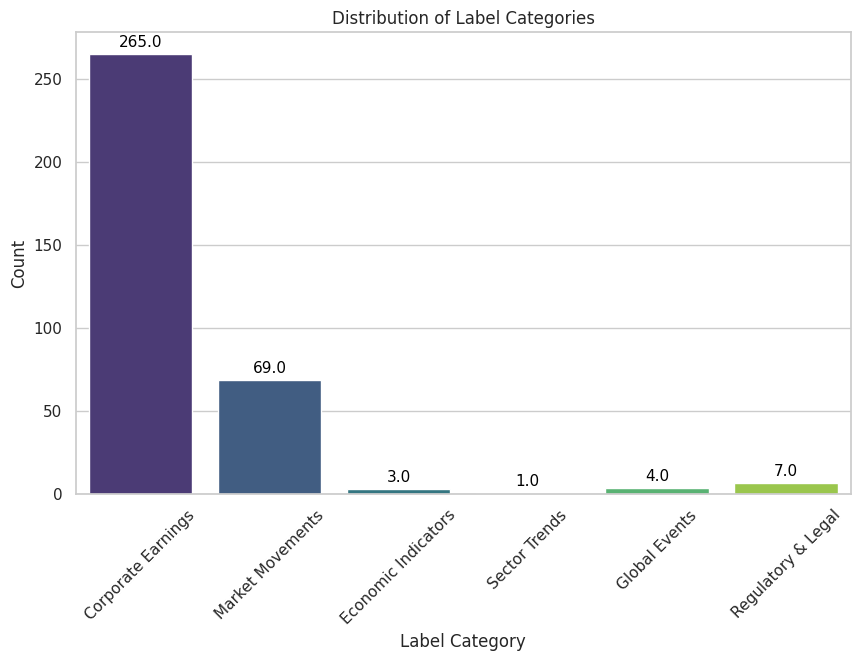

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Count Plot for Label Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Label', data=final_data_1, palette='viridis')
plt.title('Distribution of Label Categories')
plt.xlabel('Label Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better visibility if needed

# Add counts above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()




## **Sentiment Analysis**

In [ ]:
instruction_sentiment_analysis = """
    You are an AI analyzing stock market news articles. Based on the content of the article, determine whether the sentiment is bullish, bearish, or neutral. Follow these criteria to make your decision:

    - **Bullish**: The article indicates positive developments, such as:
        - Strong corporate earnings reports.
        - Positive economic indicators.
        - Mergers, acquisitions, or partnerships that enhance company value.
        - Positive guidance or forecasts from companies.
        - New product launches or successful market entries.
        - Any other news likely to increase stock prices or market confidence.

    - **Bearish**: The article suggests negative developments, such as:
        - Weak corporate earnings or revenue warnings.
        - Negative economic indicators (e.g., rising unemployment, inflation concerns).
        - Regulatory issues, legal problems, or government actions negatively impacting the company or market.
        - Product recalls, failures, or competition that undermines a company’s market position.
        - Any other news likely to decrease stock prices or market confidence.

    - **Neutral**: The article presents information that does not clearly indicate a positive or negative impact on the stock price.

    Based on the criteria above, determine the sentiment and provide a single-word response: 'Bullish', 'Bearish', or 'Neutral'.
"""



In [ ]:
data_2 = data.copy()

In [ ]:
# Function to generate a response using the LLaMA model based on the sentiment instruction
def generate_response(instruction, article):
    # Constructing the prompt for the model with the provided instruction
    system_message = """
    [INST]<<SYS>>
    {}
    <</SYS>>[/INST]
    """.format(instruction)

    # Creating the prompt by combining the article and the system message
    prompt = f"{article}\n{system_message}"

    # Generate the response using the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=64,  # Short output, so keep max_tokens small
        temperature=0,  # Deterministic response
        top_p=0.9,
        repeat_penalty=1.1,
        top_k=50,
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the text response
    response_text = response["choices"][0]["text"].strip()
    return response_text

In [ ]:
# Apply the function to the dataset
data_2['model_response_2'] = data_2['News'].apply(lambda x: generate_response(instruction_sentiment_analysis, x))


Llama.generate: prefix-match hit

llama_print_timings:        load time =    8906.15 ms
llama_print_timings:      sample time =      37.44 ms /    64 runs   (    0.58 ms per token,  1709.63 tokens per second)
llama_print_timings: prompt eval time =     164.68 ms /   427 tokens (    0.39 ms per token,  2592.86 tokens per second)
llama_print_timings:        eval time =     987.46 ms /    63 runs   (   15.67 ms per token,    63.80 tokens per second)
llama_print_timings:       total time =    1358.91 ms /   490 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    8906.15 ms
llama_print_timings:      sample time =      31.09 ms /    52 runs   (    0.60 ms per token,  1672.35 tokens per second)
llama_print_timings: prompt eval time =     131.15 ms /   428 tokens (    0.31 ms per token,  3263.54 tokens per second)
llama_print_timings:        eval time =     730.21 ms /    51 runs   (   14.32 ms per token,    69.84 tokens per second)
llama_print_timings:       to

In [ ]:
#Printing the model's response.
data_2["model_response_2"]

,model_response_2
0,"Based on the content of the article, the sentiment is Bearish. The article mentions a significant decline in the aftermarket following Apple's Q1 revenue warning, which suggests negative developments for notable suppliers such as Skyworks, Broadcom, Lumentum, Qorvo, and TSMC"
1,"Based on the content of the article, the sentiment is Bearish. The article mentions that Apple lowered its fiscal Q1 revenue guidance, which indicates negative developments for the company. This news is likely to decrease stock prices and market confidence."
2,"Based on the content of the article, the sentiment is Bearish. The article mentions that Apple cut its revenue forecast, which indicates negative developments, and this news is likely to decrease stock prices or market confidence."
3,"Based on the content of the article, the sentiment is:\n\nNeutral"
4,"Based on the content of the article, the sentiment is Bearish. The article mentions that Apple's revenue warning led to a decline in the USD/JPY pair and a gain in the Japanese yen, indicating negative developments for Apple and the overall market. Additionally, the article highlights risk"
...,...
344,"Based on the content of the article, the sentiment is:\n\nNeutral"
345,"Based on the content of the article, the sentiment is Bearish. The article mentions that European shares fell, with banks underperforming, and a decline in China's manufacturing activity. These negative developments are likely to decrease stock prices or market confidence."
346,"Based on the content of the article, the sentiment is:\n\nBullish"
347,"Based on the content of the article, the sentiment is:\n\nBullish"


In [ ]:
def extract_label(model_response):
    # Convert response to lowercase for case-insensitive matching
    response_lower = model_response.lower()

    # Define category labels based on keywords
    if 'bullish' in response_lower:
        return 'Bullish'
    elif 'bearish' in response_lower:
        return 'Bearish'
    elif 'neutral' in response_lower:
        return 'Neutral'
    else:
        return 'Uncategorized'

In [ ]:
data_2["Label"] = data_2["model_response_2"].apply(extract_label)
final_data_2 = data_2.drop(['model_response_2'], axis=1)
final_data_2.head()

,Date,News,Open,High,Low,Close,Volume,Label,cleaned_text,cleaned_text_without_stopwords
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,Bearish,the tech sector experienced a significant decline in the aftermarket following apple s q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo and tsmc saw their stocks drop in response to apple s downward revision of its revenue expectations for the quarter previously announced in january,tech sector experienced significant decline aftermarket following apple q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo tsmc saw stocks drop response apple downward revision revenue expectations quarter previously announced january
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,Bearish,apple lowered its fiscal q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iphone sales the announcement caused a significant drop in apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as nasdaq 10,apple lowered fiscal q1 revenue guidance 84 billion earlier estimates 89 93 billion due weaker expected iphone sales announcement caused significant drop apple stock price negatively impacted related suppliers leading broader market declines tech indices nasdaq 10
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,Bearish,apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in china and fewer iphone upgrades ceo tim cook also mentioned constrained sales of airpods and macbooks apple s shares fell 8 5 in post market trading while asian suppliers like hon,apple cut fiscal first quarter revenue forecast 89 93 billion 84 billion due weaker demand china fewer iphone upgrades ceo tim cook also mentioned constrained sales airpods macbooks apple shares fell 8 5 post market trading asian suppliers like hon
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,Neutral,this news article reports that yields on long dated u s treasury securities hit their lowest levels in nearly a year on january 2 2019 due to concerns about the health of the global economy following weak economic data from china and europe as well as the partial u s government shutdown apple,news article reports yields long dated u treasury securities hit lowest levels nearly year january 2 2019 due concerns health global economy following weak economic data china europe well partial u government shutdown apple
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Ap

<ipython-input-63-224d9a23488b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Label', data=final_data_2, palette='viridis')


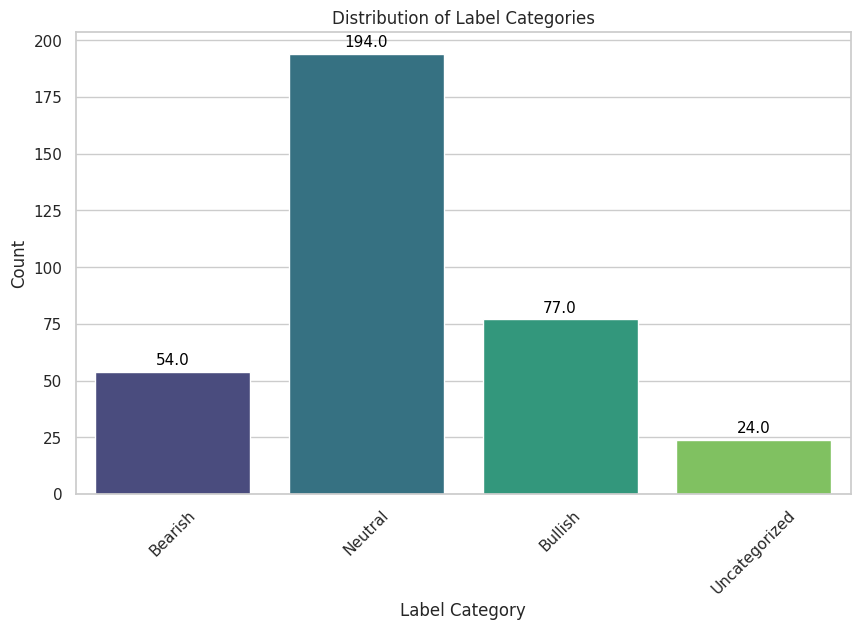

           Label       Open                           Close             \
                       mean     median       std       mean     median   
0        Bearish  44.840278  43.570000  5.434646  43.531247  42.470604   
1        Bullish  46.233863  47.505001  6.902823  44.922549  45.808159   
2        Neutral  46.493544  46.212502  6.576790  45.186516  45.177055   
3  Uncategorized  47.203021  47.691250  5.786805  45.974033  46.116428   

                   Volume                             
        std          mean       median           std  
0  5.464393  1.248559e+08  120836200.0  3.584589e+07  
1  6.831501  1.282186e+08  114843600.0  4.201189e+07  
2  6.521180  1.310124e+08  119339200.0  4.541924e+07  
3  5.767940  1.238118e+08  119878600.0  4.461035e+07  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Count Plot for Label Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Label', data=final_data_2, palette='viridis')
plt.title('Distribution of Label Categories')
plt.xlabel('Label Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better visibility if needed

# Add counts above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# 2. Summary Statistics Grouped by Label
label_stats = final_data_2.groupby('Label').agg({
    'Open': ['mean', 'median', 'std'],
    'Close': ['mean', 'median', 'std'],
    'Volume': ['mean', 'median', 'std']
}).reset_index()

# Display the summary statistics
print(label_stats)


## Assess the Potential Impact of the News on Stock Prices

In [ ]:
instruction_price_impact = """
    You are an AI analyzing stock market news articles. Determine the likely impact of the news on the stock price of the company or companies mentioned in the article. Choose one of the following:
    - Significant Positive Impact
    - Moderate Positive Impact
    - No Impact/Neutral
    - Moderate Negative Impact
    - Significant Negative Impact

    Base your assessment on the content of the article and its implications.
"""


In [ ]:
data_3 = data.copy()

In [ ]:
# Apply the function to the dataset
data_3['model_response_3'] = data_3['News'].apply(lambda x: generate_response(instruction_price_impact, x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =    8906.15 ms
llama_print_timings:      sample time =      37.65 ms /    64 runs   (    0.59 ms per token,  1699.87 tokens per second)
llama_print_timings: prompt eval time =     108.18 ms /   214 tokens (    0.51 ms per token,  1978.22 tokens per second)
llama_print_timings:        eval time =     909.85 ms /    63 runs   (   14.44 ms per token,    69.24 tokens per second)
llama_print_timings:       total time =    1232.48 ms /   277 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    8906.15 ms
llama_print_timings:      sample time =      38.41 ms /    64 runs   (    0.60 ms per token,  1666.15 tokens per second)
llama_print_timings: prompt eval time =      88.53 ms /   215 tokens (    0.41 ms per token,  2428.45 tokens per second)
llama_print_timings:        eval time =     894.41 ms /    63 runs   (   14.20 ms per token,    70.44 tokens per second)
llama_print_timings:       to

In [ ]:
#Printing the model's response.
data_3["model_response_3"]

,model_response_3
0,"Based on the content of the article, I would assess the likely impact of the news on the stock price of the companies mentioned as follows:\n\n* Skyworks: Moderate Negative Impact. The article states that Apple has revised its revenue expectations downward, which could negatively impact Sky"
1,"Based on the content of the article, it is likely that the news will have a Significant Negative Impact on the stock price of Apple. The article states that Apple lowered its fiscal Q1 revenue guidance, which indicates that the company's sales are not performing as well as expected. This"
2,"Based on the content of the article, I would assess the likely impact of the news on the stock price of Apple as ""Significant Negative Impact"". The article mentions that Apple has lowered its revenue forecast for the fiscal first quarter, citing weaker demand in China and fewer iPhone up"
3,"Based on the content of the article, I would assess the likely impact of the news on the stock price of the company or companies mentioned as ""No Impact/Neutral"". The article discusses the yield on long-dated U.S. Treasury securities hitting their lowest levels in nearly a"
4,"Based on the content of the article, it is likely that there will be a Significant Negative Impact on Apple's stock price. The article states that Apple's revenue warning has led to a decline in the USD/JPY pair and a gain in the Japanese yen, indicating"
...,...
344,"Based on the content of the article, it is likely that the news will have a Moderate Positive Impact on the stock price of the company or companies mentioned. The article mentions that media mogul Oprah Winfrey is considering which Democratic presidential candidate to endorse in 2020"
345,"Based on the content of the article, it is likely that the news will have a Moderate Negative Impact on the stock price of Danske Bank.\n\nThe article mentions that the bank is facing a significant decline in China's manufacturing activity, which could negatively impact its business and financial"
346,"Based on the content of the article, it is likely that there will be a significant positive impact on the stock price of Apple (AAPL). The article highlights Apple's strong quarterly results and positive earnings forecast, which suggests that the company is performing well and has a positive outlook. This"
347,"Based on the content of the article, I would assess the likely impact of the news on the stock price of Apple as ""Significant Positive Impact"". The article highlights positive news about Apple's earnings report, including exceeding expectations and a post-market surge in shares. This suggests"


In [ ]:
import re
import pandas as pd

# Sample function to extract labels like "Significant Positive Impact" or "Moderate Negative Impact"
def extract_impact_label(text):
    # Regular expression pattern to match phrases like "Significant Positive Impact" or "Moderate Negative Impact"
    pattern = r"(significant|moderate|no)\s+(positive|negative|neutral)\s+impact"
    match = re.search(pattern, text, re.IGNORECASE)
    if match:
        return match.group(0).capitalize()  # Capitalize the first letter for consistency
    else:
        return "No Label Found"

# Applying the function to the 'model_response' column in data_3 DataFrame
data_3['impact_label'] = data_3['model_response_3'].apply(extract_impact_label)

# Display the first few rows of the DataFrame to verify the extracted labels
print(data_3.head())


         Date  \
0  2019-01-02   
1  2019-01-02   
2  2019-01-02   
3  2019-01-02   
4  2019-01-02   

                                                                                                                                                                                                                                                                                                                                   News  \
0   The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.   
1    Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impac

In [ ]:
# Get the unique impact labels from the 'impact_label' column
unique_impact_labels = data_3['impact_label'].unique()

# Print the unique impact labels
print("Unique Impact Labels:")
for label in unique_impact_labels:
    print(label)


Unique Impact Labels:
Moderate negative impact
Significant negative impact
No Label Found
Moderate positive impact
Significant positive impact


In [ ]:
def extract_label(model_response):
    # Convert response to lowercase for case-insensitive matching
    response_lower = model_response.lower()

    # Define category labels based on keywords
    if 'Moderate negative impact' in response_lower:
        return 'Moderate Negative Impact'
    elif 'Significant negative impact' in response_lower:
        return 'Significant Negative Impact'
    elif 'Moderate positive impact' in response_lower:
        return 'Moderate Positive Impact'
    elif 'Significant positive impact' in response_lower:
        return 'Significant Positive Impact'
    elif 'No Label Found' in response_lower:
        return 'No Label Found'
    else:
        return 'Uncategorized'

In [ ]:
data_3["Label"] = data_3["model_response_3"].apply(extract_label)
final_data_3 = data_3.drop(['model_response_3'], axis=1)
# final_data_3 = data_3.drop(['Label'], axis=1)
final_data_3.head()

,Date,News,Open,High,Low,Close,Volume,Label,cleaned_text,cleaned_text_without_stopwords,impact_label
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,Uncategorized,the tech sector experienced a significant decline in the aftermarket following apple s q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo and tsmc saw their stocks drop in response to apple s downward revision of its revenue expectations for the quarter previously announced in january,tech sector experienced significant decline aftermarket following apple q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo tsmc saw stocks drop response apple downward revision revenue expectations quarter previously announced january,Moderate negative impact
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,Uncategorized,apple lowered its fiscal q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iphone sales the announcement caused a significant drop in apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as nasdaq 10,apple lowered fiscal q1 revenue guidance 84 billion earlier estimates 89 93 billion due weaker expected iphone sales announcement caused significant drop apple stock price negatively impacted related suppliers leading broader market declines tech indices nasdaq 10,Significant negative impact
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,Uncategorized,apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in china and fewer iphone upgrades ceo tim cook also mentioned constrained sales of airpods and macbooks apple s shares fell 8 5 in post market trading while asian suppliers like hon,apple cut fiscal first quarter revenue forecast 89 93 billion 84 billion due weaker demand china fewer iphone upgrades ceo tim cook also mentioned constrained sales airpods macbooks apple shares fell 8 5 post market trading asian suppliers like hon,Significant negative impact
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,Uncategorized,this news article reports that yields on long dated u s treasury securities hit their lowest levels in nearly a year on january 2 2019 due to concerns about the health of the global economy following weak economic data from china and europe as well as the partial u s government shutdown apple,news article reports yields long dated u treasury securities hit lowest levels nearly year january 2 2019 due concerns health global economy following weak economic data china europe well partial u government shutdown apple,No Label Found
4,2019-01-02,"Apple's reve

<ipython-input-72-1fe8d48724a1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='impact_label', data=final_data_3, palette='viridis')


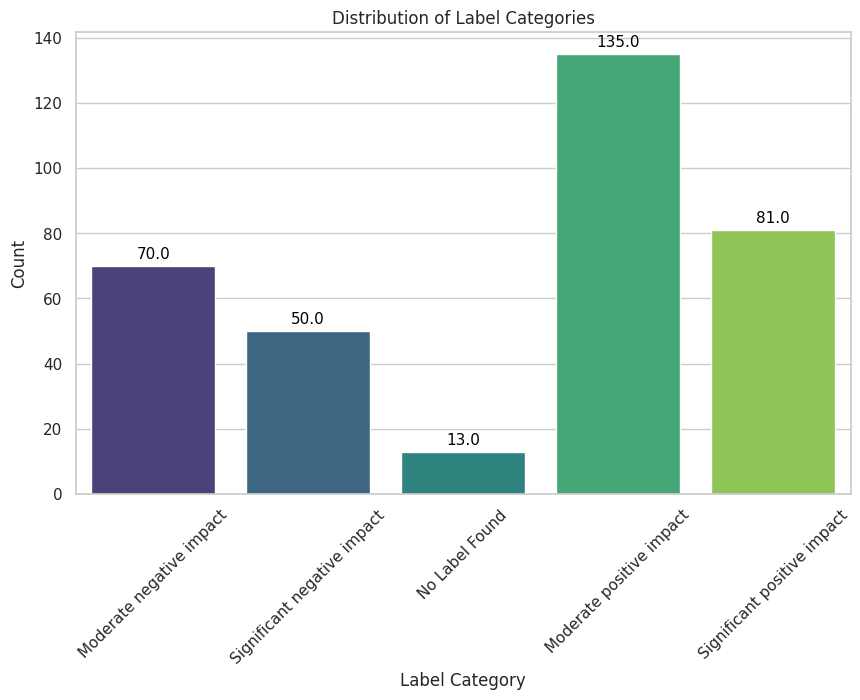

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Count Plot for Label Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='impact_label', data=final_data_3, palette='viridis')
plt.title('Distribution of Label Categories')
plt.xlabel('Label Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better visibility if needed

# Add counts above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


### Generate a Trading Recommendation Based on the News

In [ ]:
data_4 = data.copy()

In [ ]:
instruction_trading_recommendation = """
    Based on the content of the article, generate a trading recommendation. Choose one of the following:
    - Buy: The news suggests a favorable outlook for the stock, indicating potential for price increase.
    - Sell: The news suggests a negative outlook for the stock, indicating potential for price decline.
    - Hold: The news does not provide enough information for a buy or sell decision, or the impact is neutral.
    - Short: The news indicates a significant bearish trend where short selling could be beneficial.

    Provide the trading recommendation based on the article's content.
"""


In [ ]:
# Apply the function to the dataset
data_4['model_response_4'] = data_4['News'].apply(lambda x: generate_response(instruction_trading_recommendation, x))


Llama.generate: prefix-match hit

llama_print_timings:        load time =    8906.15 ms
llama_print_timings:      sample time =      37.36 ms /    64 runs   (    0.58 ms per token,  1713.15 tokens per second)
llama_print_timings: prompt eval time =     110.53 ms /   239 tokens (    0.46 ms per token,  2162.33 tokens per second)
llama_print_timings:        eval time =     910.11 ms /    63 runs   (   14.45 ms per token,    69.22 tokens per second)
llama_print_timings:       total time =    1229.51 ms /   302 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    8906.15 ms
llama_print_timings:      sample time =      38.48 ms /    64 runs   (    0.60 ms per token,  1663.33 tokens per second)
llama_print_timings: prompt eval time =      90.32 ms /   240 tokens (    0.38 ms per token,  2657.13 tokens per second)
llama_print_timings:        eval time =     899.67 ms /    63 runs   (   14.28 ms per token,    70.03 tokens per second)
llama_print_timings:       to

In [ ]:
#Printing the model's response.
data_4["model_response_4"]

,model_response_4
0,"Based on the content of the article, I would recommend a ""Sell"" trading decision for the tech sector and notable suppliers such as Skyworks, Broadcom, Lumentum, Qorvo, and TSMC. The article highlights a significant decline in the aftermarket following Apple'"
1,"Based on the content of the article, I would recommend a Sell trading decision for Apple's stock. The news suggests that the company's revenue guidance has been lowered due to weaker than expected iPhone sales, which indicates a negative outlook for the stock. Additionally, the broader market decl"
2,"Based on the content of the article, I would recommend a Sell trading decision for Apple's stock. The article states that Apple has cut its revenue forecast for the fiscal first quarter, citing weaker demand in China and fewer iPhone upgrades. This suggests a negative outlook for the"
3,"Based on the content of the article, I would recommend holding (neutral) on long-dated U.S. Treasury securities. The article states that yields have hit their lowest levels in nearly a year due to concerns about the health of the global economy, but it does not provide enough information to"
4,"Based on the content of the article, I would recommend a ""Sell"" position for Apple's stock. The news suggests that Apple's revenue is expected to be lower than expected, which could indicate a negative outlook for the company. Additionally, the article states that investors are seeking safety in highly"
...,...
344,"Based on the content of the article, I would recommend holding the stock. The news that Oprah Winfrey is considering which Democratic presidential candidate to endorse does not provide enough information to make a clear buy or sell decision. While her endorsement could potentially have an impact on the stock market, it"
345,"Based on the content of the article, I would recommend a ""Sell"" trading decision for Danske Bank. The article states that the bank ""plunged"" and that the decline in China's manufacturing activity is likely to have a negative impact on the bank's performance. Additionally, the"
346,"Based on the content of the article, I would recommend a ""Buy"" decision for investors looking to invest in the S&P 500 or broad-based index funds. The article highlights positive earnings forecasts and a record high close for the S&P 500, indicating"
347,"Based on the content of the article, I would recommend holding the stock. The news suggests that the Federal Reserve will keep interest rates unchanged, which is neutral for the stock market. Additionally, Apple's earnings report exceeding expectations could have a positive impact on the stock, but the overall outlook remains"


In [ ]:
import re
import pandas as pd

# Function to extract the trading decision (hold, buy, sell) after "i would recommend" or "i would recommend a"
def extract_recommendation(text):
    # Two separate regex patterns for "i would recommend" and "i would recommend a"
    pattern_1 = r"i would recommend\s+['\"]?(hold|holding|buy|sell|hold\s\(neutral\))['\"]?"
    pattern_2 = r"i would recommend a\s+['\"]?(hold|holding|buy|sell|hold\s\(neutral\))['\"]?"

    # First, try to match with pattern_1 ("i would recommend")
    match = re.search(pattern_1, text)
    if not match:
        # If pattern_1 doesn't match, try pattern_2 ("i would recommend a")
        match = re.search(pattern_2, text)

    if match:
        # Normalize "holding" and "hold (neutral)" to "Hold"
        if match.group(1).startswith("hold"):
            return "Hold"
        else:
            return match.group(1).capitalize()
    else:
        return "No Decision Found"

# Convert the 'model_response_4' column to lowercase
data_4['model_response_4'] = data_4['model_response_4'].str.lower()

# Applying the function to the 'model_response_4' column in data_2 DataFrame
data_4['trading_decision'] = data_4['model_response_4'].apply(extract_recommendation)

# Displaying the first few rows of the DataFrame to verify the extracted decisions
print(data_4[['model_response_4', 'trading_decision']].tail(20))




                                                                                                                                                                                                                                                                                                                                           model_response_4  \
329                                                                   based on the content of the article, i would recommend a "hold" trading recommendation for beijing bytedance technology co. the news of the indian government's ban on tiktok does have a negative impact on the company's financial performance, with estimated daily losses of $6.6   
330              based on the content of the article, i would recommend holding the stock. the news that lg electronics will cease smartphone production in south korea and shift manufacturing to vietnam does not provide enough information to make a buy or sell decision. while this move may help th

In [ ]:
data_4["Label"] = data_4["model_response_4"].apply(extract_label)
final_data_4 = data_4.drop(['model_response_4'], axis=1)
# final_data_3 = data_3.drop(['Label'], axis=1)
final_data_4.head()

,Date,News,Open,High,Low,Close,Volume,Label,cleaned_text,cleaned_text_without_stopwords,trading_decision
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,Uncategorized,the tech sector experienced a significant decline in the aftermarket following apple s q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo and tsmc saw their stocks drop in response to apple s downward revision of its revenue expectations for the quarter previously announced in january,tech sector experienced significant decline aftermarket following apple q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo tsmc saw stocks drop response apple downward revision revenue expectations quarter previously announced january,Sell
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,Uncategorized,apple lowered its fiscal q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iphone sales the announcement caused a significant drop in apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as nasdaq 10,apple lowered fiscal q1 revenue guidance 84 billion earlier estimates 89 93 billion due weaker expected iphone sales announcement caused significant drop apple stock price negatively impacted related suppliers leading broader market declines tech indices nasdaq 10,Sell
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,Uncategorized,apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in china and fewer iphone upgrades ceo tim cook also mentioned constrained sales of airpods and macbooks apple s shares fell 8 5 in post market trading while asian suppliers like hon,apple cut fiscal first quarter revenue forecast 89 93 billion 84 billion due weaker demand china fewer iphone upgrades ceo tim cook also mentioned constrained sales airpods macbooks apple shares fell 8 5 post market trading asian suppliers like hon,Sell
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,Uncategorized,this news article reports that yields on long dated u s treasury securities hit their lowest levels in nearly a year on january 2 2019 due to concerns about the health of the global economy following weak economic data from china and europe as well as the partial u s government shutdown apple,news article reports yields long dated u treasury securities hit lowest levels nearly year january 2 2019 due concerns health global economy following weak economic data china europe well partial u government shutdown apple,Hold
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen,

<ipython-input-83-0b8a806cb4bf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='trading_decision', data=final_data_4, palette='viridis')


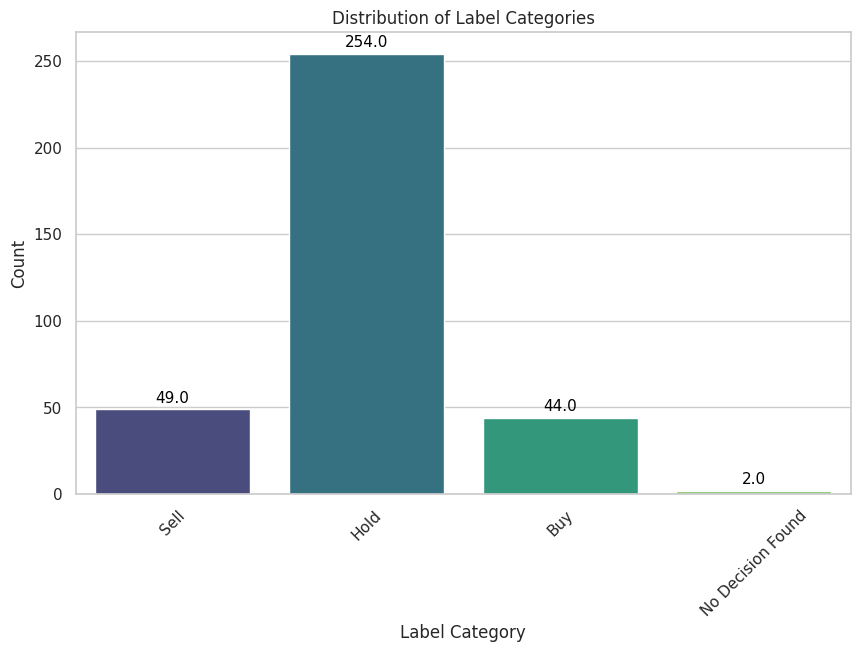

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Count Plot for Label Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='trading_decision', data=final_data_4, palette='viridis')
plt.title('Distribution of Label Categories')
plt.xlabel('Label Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better visibility if needed

# Add counts above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


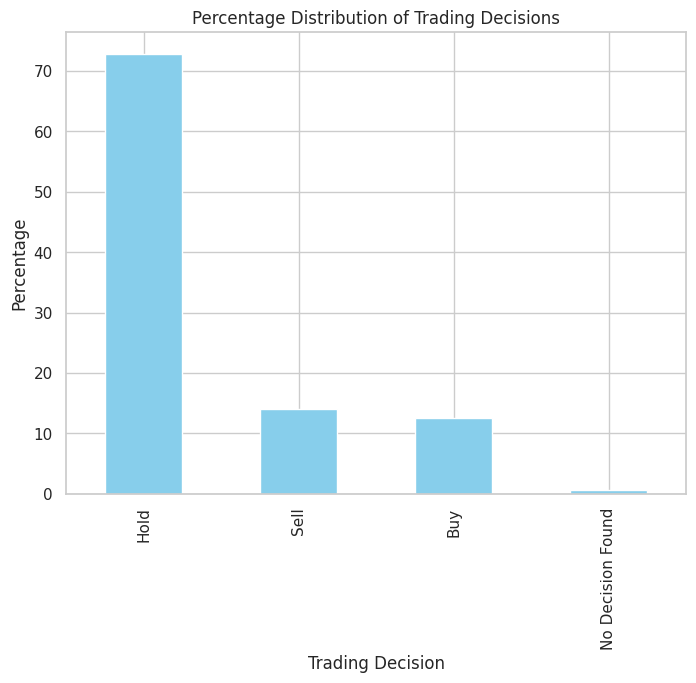

In [ ]:
# Calculate the percentage distribution of trading decisions
trading_decision_percent = data_4['trading_decision'].value_counts(normalize=True) * 100

# Bar plot
plt.figure(figsize=(8, 6))
trading_decision_percent.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Trading Decisions')
plt.xlabel('Trading Decision')
plt.ylabel('Percentage')
plt.show()


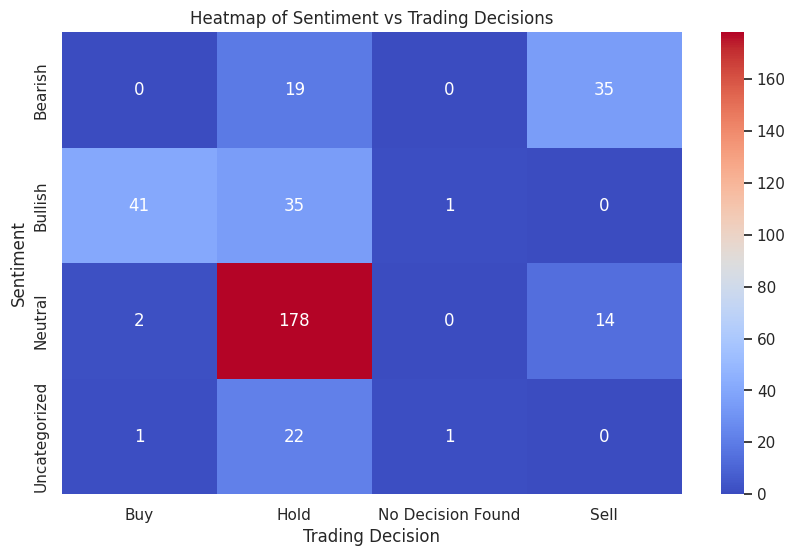

In [ ]:
# Example code assuming 'sentiment' column exists with values like 'Positive', 'Neutral', 'Negative'
sentiment_decision_matrix = pd.crosstab(data_2['Label'], data_4['trading_decision'])

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_decision_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Sentiment vs Trading Decisions')
plt.xlabel('Trading Decision')
plt.ylabel('Sentiment')
plt.show()

## Key Observations:

### Neutral Sentiment:
The largest concentration is in the "Neutral" sentiment category with the Hold trading decision (178 counts). This suggests that when the sentiment is neutral, the model most frequently recommends holding the stock, which is a reasonable approach when there's no clear indication for buying or selling.

### Bullish Sentiment:
There is a noticeable presence of both Buy (41 counts) and Hold (35 counts) recommendations in the "Bullish" sentiment category. This makes sense as a bullish sentiment typically correlates with either a buying opportunity or holding a currently valuable asset.

### Bearish Sentiment:
The majority of recommendations in the "Bearish" category are Hold (19 counts) and Sell (35 counts). A bearish sentiment logically leads to a higher proportion of Sell recommendations, as the market outlook is negative.

### Uncategorized Sentiment:
The "Uncategorized" sentiment category also has a significant number of Hold decisions (22 counts). This might indicate that when the model is unsure of the sentiment or when the sentiment cannot be categorized, it defaults to a Hold decision.

### No Decision Found:
There are very few instances where the model response did not yield a decision across the different sentiment categories. This suggests that the model is generally effective in providing recommendations.

## **Conclusions and Recommendations**

## Conclusions

### Data Quality and Structure:

The dataset contains diverse stock news articles, with sentiments ranging from bullish to bearish, and trading decisions such as Hold, Buy, and Sell.
The model’s responses often categorize news articles effectively, but there are inconsistencies, particularly in cases where sentiment cannot be easily classified, leading to a high number of "Neutral" or "Uncategorized" labels.
The dataset is well-structured for analysis, with separate columns for news content, sentiment labels, and trading decisions.

### Model Accuracy and Consistency:

The model shows consistent behavior when linking sentiment to trading decisions. For example, it frequently recommends Buy for bullish sentiment and Sell for bearish sentiment, aligning with standard investment strategies.
However, a significant number of recommendations default to Hold, particularly when the sentiment is neutral or when the article is categorized as "Uncategorized." This may indicate that the model takes a conservative approach in ambiguous situations.
The model’s ability to extract trading decisions like Hold, Buy, and Sell has been validated through regex patterns, but there are cases where decisions are not found. This suggests that variations in the phrasing of recommendations may still lead to some inconsistencies.


## Recommendations and further future work:

### Diversify News Coverage:

Recommendation: Increase coverage and analysis on "Global Events," "Regulatory & Legal," and "Economic Indicators." While these categories are less frequently mentioned, they are crucial for providing a complete market perspective and long-term economic outlook, which are essential for strategic investment decisions.

### Focus on Earnings for Volatility:

Recommendation: Given the high volatility associated with "Corporate Earnings," traders could use earnings reports as opportunities for short-term trades. Monitoring earnings dates and preparing strategies around them (e.g., straddles for options traders) could be beneficial.

### Enhance Sentiment Analysis and Categorization:

Recommendation: Review and refine the model’s sentiment and category assignment, particularly for the "Uncategorized" articles. Improving this aspect could ensure better accuracy and utility for traders relying on sentiment as a key input.
It might also be beneficial to investigate why a significant portion of the data falls under "Neutral." If possible, further segment these neutral articles to see if they can provide additional actionable insights when combined with other factors (e.g., volume spikes, unusual price movements).

-




<font size=6 color='blue'>Power Ahead</font>
___